# Horizontal & Vertical Kernel    LRM

In [1]:
# read csv file 
dataset <- read.csv ("h.csv", na.strings="",stringsAsFactors=FALSE)

In [2]:
head(dataset)

IMAGE,FLOPS,BYTE,BLOCK_SIZE,KERNEL_T
256,1572864,65536,8,1.28
256,1572864,32768,16,1.44
256,1572864,16384,32,1.51
512,6291456,262144,8,2.82
512,6291456,131072,16,3.37
512,6291456,65536,32,3.57


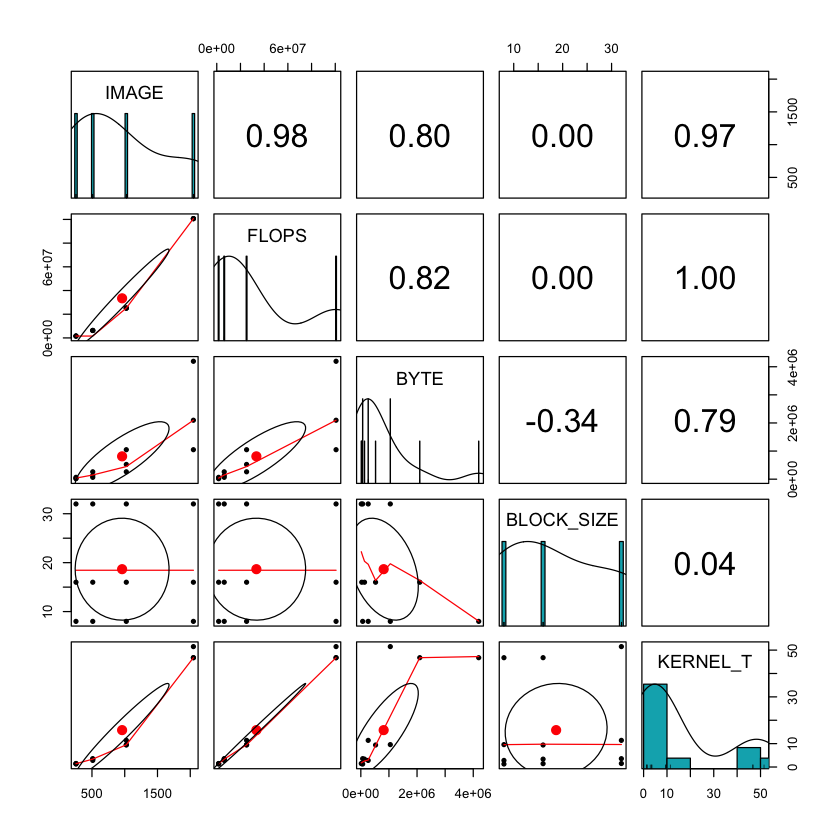

In [4]:
library(psych)
pairs.panels(dataset, 
             method = "pearson", # correlation method
             hist.col = "#00AFBB",
             density = TRUE,  # show density plots
             ellipses = TRUE # show correlation ellipses
)

In [3]:
model<-lm(KERNEL_T~FLOPS+BYTE+BLOCK_SIZE,data=dataset)
summary(model) # display summary 

new<-data.frame(FLOPS=1415577600,BYTE=14745600,BLOCK_SIZE=32) # predication value 
res<-predict(model,newdata=new) # predication result 
cat("Horizontal & Vertical Kernel Modeling. Image Size 3072x3072 and Predicted Kernel time (ms): ",res)



Call:
lm(formula = KERNEL_T ~ FLOPS + BYTE + BLOCK_SIZE, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3854 -1.3596  0.4742  0.9511  1.6249 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.043e+00  1.169e+00  -0.893    0.398    
FLOPS        5.015e-07  2.249e-08  22.302 1.73e-08 ***
BYTE        -9.484e-07  8.072e-07  -1.175    0.274    
BLOCK_SIZE   4.471e-02  5.464e-02   0.818    0.437    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.515 on 8 degrees of freedom
Multiple R-squared:  0.9958,	Adjusted R-squared:  0.9942 
F-statistic:   634 on 3 and 8 DF,  p-value: 7.562e-10


Horizontal & Vertical Kernel Modeling. Image Size 3072x3072 and Predicted Kernel time (ms):  696.3081

b<-32
i<-7680

cat('flops')
 4*(2*3*b^2*i^2/b^2)
cat('global')
4*(2*b *i^2/b^2)